# NLP - Session 16 - TF20 | Keras | Glove Vectors Embedding

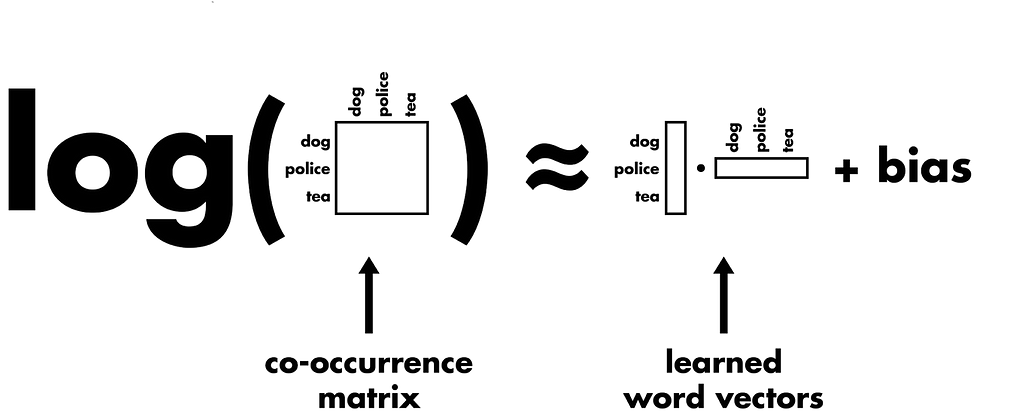

`GloVe` stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating a global word-word co-occurrence matrix from a corpus. The resulting embeddings show interesting linear substructures of the word in vector space.

#### Ref:
 - Glove Vectors: 

https://nlp.stanford.edu/projects/glove/

 - Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download):

http://nlp.stanford.edu/data/glove.840B.300d.zip

 - Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): 

http://nlp.stanford.edu/data/glove.twitter.27B.zip

#### GloVe
Glove is one of the text encodings patterns. If you have the NLP project in your hand then Glove or Word2Vec are important topics.

### But the first question is What is Glove?

##### Glove: Global Vectors Word Representation.
We know that a machine can understand only the numbers. The machine will not understand what is mean by `“I am Indian”`. So to transform this into numbers there are some mechanisms. We can use the `One-Hot-Encoding` also. In One-Hot-Encoding we create a matrix of the n-dimension of the words against a vocabulary. Vocabulary is a list of words and then we put 1 in the row where word of our text matches and the rest of the places are 0.

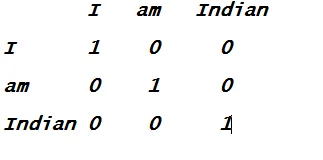

But there is a problem if you see these are just the word representation in 0 and 1 but there is no linking or direction in the numbers or words Or we can not find the distance between the 2 words or 2 sentences using this encoding method.

#### But the second question is what we are going to do by using this distance between the 2 words. 
Yes, definitely question is important. So just take a simple example, we have one problem statement and we have 10 documents and we have to find the given text is the best matching to which of the 10 documents. Here we can not just use some word matching algorithms and say that these specific words are matching in a few of the document As `It Is because there may be some other document that has similar words and not the exact word as per query text`. So to find the similarity between the words we need a vector that will give us the word representation in different dimensions and then we can compare this word vector with another word vector and find the distance between them.

To accomplish this task we need to find the vector representation of the word. And one of the best ways to find word representation in vector-matrix is `GLOVE`

In [ ]:
import numpy as np
import pandas as pd
from numpy import array
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (
    Activation,
    Conv1D,
    Dense,
    Dropout,
    Embedding,
    Flatten,
    GlobalMaxPooling1D,
    MaxPooling1D,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# reading dataset

df = pd.read_csv("data/twitter4000.csv")
df.head()

#### Preprocessing and Cleaning
Here, we are doing the text processing where we are performing below steps :

 - Expanding the contracted words or tokens
 - Removing Email
 - Removing URLs and HTML tags
 - Removing ‘RT’ retweet tags
 - Replacing all non-alphabets values with null
 - We are defining a dictionary contractions to replace all the short text values with their corresponding expanded values.

In [ ]:
# dictionary `contractions` to replace all the short text values with their corresponding the expanded values
# you can add more values as per your requirements.

contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how does",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    " u ": " you ",
    " ur ": " your ",
    " n ": " and ",
}

In the below function `get_clean_text()`, we are performing all the data cleaning activities like `expanding the contracted words or tokens, removing Email , removing URLs and HTML tags , removing ‘RT’ retweet tags and replacing all non alphabets values with null`

In [ ]:
%%time
import re

text = ' '.join(df['twitts'])
text = text.split()
freq_comm = pd.Series(text).value_counts()
rare = freq_comm[freq_comm.values == 1]

def get_clean_text(x):
    if type(x) is str:
        x = x.lower()
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        x = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x) 
        #regex to remove to emails
        x = re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)
        #regex to remove URLs
        x = re.sub('RT', "", x)
        #substitute the 'RT' retweet tags with empty spaces
        x = re.sub('[^A-Z a-z]+', '', x)
        #combining all the text excluding rare words.
        x = ' '.join([t for t in x.split() if t not in rare])
        return x
    else:
        return x
    
df['twitts'] = df['twitts'].apply(lambda x: get_clean_text(x))        

In [ ]:
# Displaying the cleaned texts

df["twitts"]

In [ ]:
# Displaying the categorical values

df["sentiment"].value_counts()

In [ ]:
# Conversion to list and then displaying the list

text = df["twitts"].tolist()
text[:3]

In [ ]:
# Storing the values of sentiment column to variable y

y = df["sentiment"]

In [ ]:
# Tokenizer to read all the words present in our corpus

token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
# Declaring the vocab_size

vocab_size = len(token.word_index) + 1
vocab_size

In [ ]:
# Conversion to numerical formats

encoded_text = token.texts_to_sequences(text)

In [ ]:
# Printing the values of encoded texts of top 3 rows

print(encoded_text[:3])

In [ ]:
# max_length = 120 means we are considering max 120 words or token only
# padding = 'post' means that we padding post the sentence(keeping values 0 if the tokens are not there)

max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding="post")

In [ ]:
print(X)

In [ ]:
# Printing the dimension of X array

X.shape

### `GloVe Vectors`

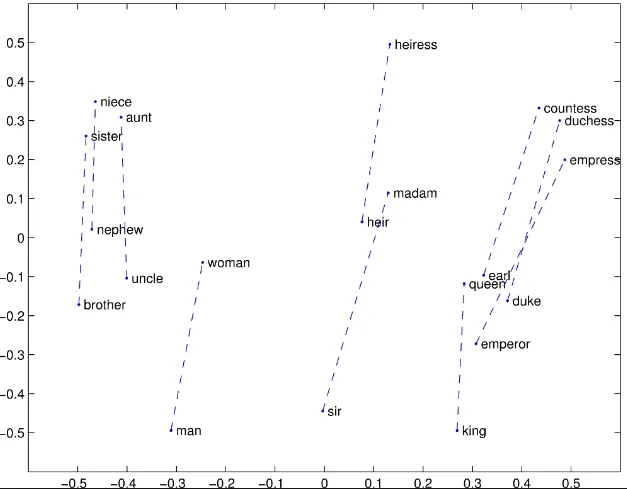

`# you -0.11076 0.30786 -0.5198 0.035138 0.10368 -0.052505...... -0.35471 0.2331 -0.0067546 -0.18892 0.27837 -0.38501 -0.11408 0.28191 -0.30946 -0.21878 -0.059105 0.47604 0.05661`

`# our first text is key and rest are there vector representation in glove`

In [ ]:
# Displaying the column 'twitts' of dataframe

df["twitts"]

In [ ]:
# Declaring dict to store all the words as keys in the dictionary and their vector representations as values

glove_vectors = dict()

In [ ]:
%%time
# file = open('glove.twitter.27B.200d.txt', encoding='utf-8')
file = open('data/glove.twitter.27B.200d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0]
    #storing the word in the variable
    vectors = np.asarray(values[1: ])
    #storing the vector representation of the respective word in the dictionary
    glove_vectors[word] = vectors
file.close()

In [ ]:
# Printing length of glove vectors
len(glove_vectors)

In [ ]:
keys = glove_vectors.keys()
len(keys)

We have total `1193514` key values pairs in our dictionary of `glove vectors`

In [ ]:
glove_vectors.get("aassrfdfa")

In [ ]:
glove_vectors.get("you").shape

#### Observation:
1. You can see above that misspelled words are not having their vector representation.

2. Since we have taken the glove vectors of 200 dimensions, that’s why the word ‘you’ is having 200 values.

Now we are creating a matrix for the tokens which we are having in our dataset and then storing their vector representation values in the matrix if it matches with glove_vectors words else print the misspelled words or words which are not present.

In [ ]:
word_vector_matrix = np.zeros((vocab_size, 200))

for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    else:
        print(word)

In [ ]:
word_vector_matrix[0]

#### Model building

In [ ]:
# Splitting the dataset into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, stratify=y
)

Now, we are building a model using `Tensorflow.Keras` library below.

Below are explanation of each parameters which we are passing:

 - `vocab_size` : This is the input dimension in which we will take all the tokens present in our dataset.

 - `vec_size` : This is the size of the vector space in which words will be embedded.

 - `input_length` : This is the length of input sequences, as you would define for any input layer of a Keras model.

 - `weights` : Here we are taking pretrained weights of each word.

 - `trainable` : Here, we do not want to update the learned word weights in this model(since we are using glove vectors here), therefore we will set the trainable attribute for the model to be False.

In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
vec_size = 200

model = Sequential()
model.add(
    Embedding(
        vocab_size,
        vec_size,
        input_length=max_length,
        weights=[word_vector_matrix],
        trainable=False,
    )
)

model.add(Conv1D(64, 8, activation="relu"))
# here 64 is number of filters and 8 is size of filters
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu"))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

In [ ]:
# Here we will clean text using the same method as we have done above
# Using same token object we have used here which we have used during training dataset


def get_encode(x):
    x = get_clean_text(x)
    x = token.texts_to_sequences(x)
    x = pad_sequences(x, maxlen=max_length, padding="post")
    return x

In [ ]:
get_encode(["i hi how are you isn't"])

In [ ]:
# Predicting on text

model.predict_classes(get_encode(["thank you for watching"]))

### Summary:
 - Firstly, we have loaded the dataset using pandas.
 - After loading the dataset, we have cleaned the dataset using a function get_clean_text().
 - Then using Tokenizer we have tokenized the entire text corpus.
 - We have used glove vectors to create a dictionary and then converted it to a weight matrix(used the same during model training).
 - Here we have used loss function as binary_crossentropy and metric as ‘accuracy’